In [1]:
import pandas as pd
import numpy as np
import annoy
from tqdm.notebook import tqdm
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

In [2]:
transactions=pd.read_csv('transactions_train.csv')

In [3]:
transactions.shape

(31788324, 5)

In [4]:
articles=pd.read_csv('articles.csv')

In [5]:
articles.shape

(105542, 25)

In [6]:
articles.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [8]:
path=os.listdir('images/')

In [11]:
img=[]
for i in path:
    a=os.listdir('images/'+i)
    img.extend(a)

In [12]:
len(img)

105100

In [13]:
img_pres=pd.DataFrame(img)

In [14]:
img_pres.head()

,0
0,0108775015.jpg
1,0108775044.jpg
2,0108775051.jpg
3,0110065001.jpg
4,0110065002.jpg


In [15]:
img_pres.to_csv('img_pres.csv')

In [16]:
a=list(img_pres[0].str.split('.jpg',expand=True)[0][1:])
b=[]
for i in a:
    print(i[1:])
    b.append(int(i[1:]))

108775044
108775051
110065001
110065002
110065011
111565001
111565003
111586001
111593001
111609001
112679048
112679052
114428026
114428030
116379047
118458003
118458004
118458028
118458029
118458034
118458038
118458039
120129001
120129014
120129018
120129025
123173001
126589006
126589007
126589010
126589011
126589012
129085001
129085026
129085027
130035001
141661022
141661025
144993001
145872001
145872037
145872043
145872051
145872052
145872053
146706001
146706004
146706005
146721001
146721002
146730001
147339034
148033001
148033006
150959011
150959013
153115019
153115020
153115021
153115039
153115040
153115043
156224001
156224002
156227001
156227002
156231001
156231002
156289011
156610001
156610007
156610010
158340001
160442007
160442010
160442042
160442043
162074062
162074069
162074071
163734002
163734054
164912035
164912039
174057022
174057026
174057027
174057029
174057030
174057032
174057033
174057035
174057036
174057037
174057038
174057039
174057040
176209023
176209025
176209033


382468007
383152002
383152003
383569008
383569009
384263008
384263010
384263011
384263013
384482001
384482002
384482003
384482006
384482008
384482009
384482010
384654004
384654009
384654011
384654021
384654022
384654023
384851001
384851004
384851013
384851019
384851022
384851023
386399006
386399009
386399011
386463001
386463006
386463014
386678001
386678003
386681012
386681013
386681014
386681016
386681018
386695004
386859006
386859007
386859019
386859026
386859027
386859028
386859029
386859030
386859037
386859038
386859044
386859050
386859051
386859053
386859061
387348012
387348016
387348017
387348018
387348019
387348020
387348021
387348022
387348023
387348025
387348029
387348030
387426012
387444006
387843034
387843035
387843036
387843037
387843041
388573002
388916006
389236006
389388001
389479006
389479007
389892002
390469004
390469005
390469006
390512001
390512006
390512010
390512011
390512018
390531007
390531008
391032005
391032007
391032009
391032010
391032011
391598044
391598046


470636007
470636039
470636040
470636041
470636042
470636045
470636057
470636061
470636062
470636064
470766003
470789001
470789003
470789012
470789013
470789016
470789018
470789019
470789020
470789028
470789030
470789031
470985003
470985009
471074002
471074004
471074011
471074012
471077001
471456001
471456002
471566003
471566004
471566005
471566006
471641003
471714002
471714005
471714008
471714009
471714012
471714013
471714014
471714020
471714028
471714031
471714035
471714036
471714037
472064004
472064005
472064006
472064008
472064011
472064012
472064013
472064015
472064016
472064018
472064019
472064020
472064021
472064022
472064023
472065002
472243006
472320001
472320003
472341002
472447001
472447005
472755002
472844004
473034001
473034009
473034010
473497002
473507001
473507002
473507003
473507004
473507006
473954005
473954006
473954008
473954013
473954014
473954015
474061003
474088001
474088005
474123001
474123003
474123009
474123013
474123014
474123015
474123016
474123018
474138001


501405002
501406003
501406004
501406005
501407003
501407004
501436007
501436008
501448003
501501001
501509001
501509002
501509003
501568006
501616001
501616002
501616004
501616006
501616007
501616008
501616009
501616010
501616011
501616012
501616020
501616028
501616048
501616068
501616069
501616074
501616085
501616086
501616087
501616088
501616089
501616090
501619001
501619006
501619007
501619009
501619010
501619013
501619014
501619015
501619017
501619018
501619019
501619020
501619023
501619024
501619026
501620004
501620010
501620011
501620012
501620013
501620015
501620016
501620018
501620019
501620022
501620023
501620026
501620027
501620028
501620029
501620030
501620031
501620032
501620035
501620036
501620037
501620038
501620040
501620042
501620043
501620045
501620046
501620047
501620049
501722004
501722005
501722010
501722011
501722012
501722014
501722017
501722020
501722022
501722024
501722025
501722026
501722027
501722028
501722029
501722030
501722031
501784001
501794002
501807001


519773002
519773003
519780001
519780002
519780004
519788002
519788003
519788004
519788005
519789001
519789002
519789003
519789004
519797001
519809001
519818001
519827001
519847001
519847002
519847005
519847006
519847010
519847011
519847012
519847021
519847023
519847024
519847025
519853004
519856002
519856003
519856007
519856008
519863002
519863006
519863007
519863009
519894002
519914001
519914004
519914006
519914008
519914009
519914010
519925001
519925002
519926001
519926002
519929006
519929007
519929008
519929009
519929010
519929019
519930001
519933001
519936007
519936010
519936013
519936025
519936026
519936027
519936028
519936029
519936030
519936034
519936035
519936036
519936038
519936040
519936043
519936044
519975001
519975002
519975006
519975007
519975008
520025002
520025004
520133001
520175003
520175004
520175005
520175006
520175009
520175010
520175011
520175012
520175013
520175014
520175017
520204003
520364002
520364003
520370001
520390004
520392001
520418002
520424001
520424003


541491012
541491013
541491014
541491015
541491016
541492001
541500001
541512001
541512002
541512010
541512013
541512014
541518001
541518004
541518011
541518015
541518018
541518023
541518026
541518027
541519001
541519006
541519007
541519011
541519015
541519018
541519021
541519024
541519026
541519028
541519029
541519031
541519033
541519034
541537001
541549001
541569001
541631001
541695001
541695002
541702001
541702004
541705001
541705002
541706002
541706003
541706006
541706015
541706016
541706018
541706019
541720001
541720002
541721001
541742001
541746002
541758001
541758002
541758003
541763001
541778003
541803001
541803002
541803006
541803011
541803014
541810001
541810002
541848001
541883001
541883003
541906001
541906003
541916002
541917001
541917004
541926001
541985002
541997001
542010001
542010002
542010005
542014001
542016001
542017006
542017007
542017008
542018003
542028002
542033001
542039004
542039005
542044001
542049001
542049005
542051002
542051003
542052001
542057001
542073005


556059001
556059005
556106001
556137001
556137002
556137003
556137004
556138001
556141001
556144001
556174005
556215001
556255001
556255003
556255005
556260001
556260002
556260004
556260007
556260008
556313001
556346001
556350001
556350004
556352001
556352002
556360001
556360002
556360006
556361002
556361004
556363013
556364001
556379003
556393001
556395001
556403001
556408001
556409003
556409008
556410002
556415001
556420001
556420002
556424001
556429002
556429004
556429006
556436001
556438001
556438009
556438012
556438013
556438014
556439001
556439003
556493004
556493009
556493015
556497001
556497008
556498001
556527002
556527003
556527004
556527008
556527009
556527010
556527011
556527015
556527016
556527017
556527018
556527019
556527020
556528002
556528003
556528006
556528008
556528009
556528010
556528011
556528015
556528016
556539001
556539003
556539010
556539011
556539014
556539016
556539018
556539023
556539026
556539027
556539028
556539030
556539032
556539033
556539034
556539036


570169001
570175001
570177001
570186008
570189001
570189002
570189003
570189006
570189010
570190001
570192001
570232001
570232002
570233001
570233002
570240003
570240005
570241003
570241005
570242001
570243001
570268001
570279001
570282001
570296002
570302001
570303001
570303003
570309005
570319001
570319002
570319003
570319012
570319013
570319014
570319015
570319017
570319018
570319021
570319024
570319025
570319029
570319036
570319043
570319050
570319054
570319060
570319066
570322004
570325002
570333001
570333002
570338001
570339001
570342001
570342002
570342003
570365001
570367001
570376001
570384002
570386001
570428001
570431001
570431003
570447001
570450001
570450002
570450003
570459002
570463001
570463002
570463006
570474003
570474004
570474005
570474010
570474011
570474013
570474016
570474018
570474033
570489001
570489002
570489005
570530004
570530006
570546001
570566001
570573002
570574001
570574002
570574003
570579003
570579006
570579007
570588001
570590001
570635001
570648001


582248004
582248007
582252001
582254001
582256001
582256002
582256004
582257001
582257002
582257004
582257005
582258001
582304002
582326002
582340002
582340003
582340004
582388001
582388002
582401001
582401002
582408001
582416001
582420001
582420002
582423001
582449004
582449005
582450001
582456001
582456002
582456003
582462001
582462002
582462004
582462006
582462007
582462008
582477001
582480001
582480004
582480005
582480006
582480013
582480015
582480016
582480023
582480024
582480026
582480027
582480032
582528001
582528002
582535001
582536001
582536002
582577001
582577002
582577004
582577005
582579001
582625005
582625006
582642001
582642002
582642003
582652001
582659001
582659003
582659004
582659006
582694001
582695001
582697001
582699001
582701001
582737001
582737004
582751001
582754002
582761001
582762001
582766002
582766003
582789001
582789002
582789004
582807001
582847001
582847002
582847006
582881001
582894001
582894005
582902001
582959001
582959002
582987002
582998001
583005001


594581012
594581014
594581015
594581021
594581022
594581028
594581029
594581030
594581031
594581034
594581037
594581038
594581039
594581040
594581041
594589001
594591001
594591011
594591012
594591013
594592002
594596001
594601001
594602001
594606001
594618001
594619001
594619003
594619004
594626001
594633001
594633002
594640001
594640002
594674001
594681001
594687002
594697001
594697003
594697005
594698001
594741001
594741002
594741003
594741006
594750001
594756001
594783001
594783002
594785001
594793001
594793002
594803001
594805002
594823008
594823010
594832001
594832002
594834001
594834002
594834007
594834010
594834016
594834018
594846001
594879001
594879002
594879003
594898001
594898002
594898004
594909002
594909004
594909005
594912001
594921005
594921008
594922001
594922003
594922006
594922007
594926001
594935002
594941001
594978001
594978004
594978005
594978007
594978016
594978017
594978021
594978025
594978026
594978027
594978029
594978030
594978031
594987001
594987002
594987003


606674001
606679001
606679002
606679003
606692001
606696001
606696002
606696003
606696006
606698001
606710001
606710003
606710004
606711001
606711003
606711005
606712001
606712004
606714001
606722002
606722003
606724001
606727001
606728001
606737001
606738001
606738002
606738003
606742001
606742003
606743001
606743002
606752001
606756001
606756004
606757001
606760004
606764001
606769001
606778001
606800001
606800002
606800004
606805003
606805004
606814001
606814002
606864001
606867001
606868001
606868002
606880001
606894001
606956001
606982001
606982004
606983001
606987001
606994003
607006001
607006002
607009004
607025001
607025002
607028001
607030001
607030002
607030006
607030008
607031001
607031002
607031008
607031009
607032001
607036001
607046002
607046003
607046004
607054001
607060001
607074001
607074002
607074003
607074004
607076001
607083002
607084001
607088001
607117001
607118008
607122002
607122003
607122006
607145001
607146002
607147001
607151001
607151002
607153001
607154001


616540001
616540002
616540003
616543005
616543006
616543007
616549001
616552001
616559002
616559003
616573001
616576001
616585001
616597001
616597002
616598001
616598002
616598005
616598013
616598019
616598022
616598023
616598025
616601001
616619001
616632001
616635001
616635003
616636001
616636002
616636003
616641001
616655002
616660001
616695001
616697001
616697002
616705001
616705002
616708001
616708002
616708003
616708004
616708006
616711001
616711003
616711005
616711010
616711011
616715002
616715003
616732001
616733001
616733003
616739001
616752002
616763001
616763002
616763004
616763007
616763008
616763009
616763010
616767002
616776003
616799001
616799003
616799004
616807001
616807003
616808002
616819001
616835004
616835005
616835006
616836001
616849003
616849006
616849011
616849012
616849014
616849015
616849016
616867002
616869002
616871001
616871002
616875002
616875003
616892001
616892002
616896007
616896008
616896009
616905002
616909001
616910001
616910003
616910004
616910007


623990002
623992001
623993003
623994001
623994002
623994003
623994004
623997001
624001001
624001004
624002002
624002007
624004001
624005001
624005004
624006001
624006002
624007001
624022001
624023002
624029001
624042001
624042002
624042003
624042004
624042005
624048001
624048002
624048003
624050002
624050003
624050004
624050007
624061001
624062002
624062003
624062004
624062005
624062007
624063001
624063002
624063003
624065001
624065002
624066001
624066002
624066003
624066005
624066006
624066007
624066008
624067001
624067002
624067003
624067004
624070002
624070004
624070005
624070008
624071006
624071007
624071011
624071012
624082001
624104001
624104002
624110001
624110002
624110003
624110004
624110006
624119001
624120001
624120004
624120005
624121001
624121003
624121004
624121005
624122003
624122004
624122005
624122007
624122008
624122009
624123001
624123003
624123004
624123005
624124001
624124003
624124004
624124016
624134001
624134005
624140002
624148001
624148003
624150001
624151001


632811003
632813001
632813002
632813004
632813005
632817001
632817002
632817003
632827001
632829001
632832001
632832002
632832003
632832004
632832005
632832006
632832007
632843001
632849001
632849002
632862001
632862002
632872001
632873001
632936002
632936003
632936004
632938001
632970002
632982001
632982002
632982003
632982013
632982014
632982015
632982016
632982020
632982021
632982025
632982033
632982036
632982038
632982044
632982054
632982059
633000001
633002001
633017001
633017002
633017004
633025001
633025002
633042001
633042002
633051001
633051005
633051007
633109001
633109002
633109005
633130001
633130002
633130005
633130006
633130007
633130008
633130009
633130010
633130011
633130012
633130013
633130014
633130015
633130016
633130017
633130019
633130020
633130023
633131001
633131002
633132003
633133001
633133002
633133007
633133008
633135001
633135004
633135005
633135006
633136001
633136003
633136004
633136005
633136006
633136007
633136008
633136009
633136010
633136013
633136017


640565001
640565003
640567001
640570002
640597001
640597003
640605004
640605005
640613001
640613002
640613003
640619001
640622002
640622005
640622006
640622008
640639001
640639002
640639003
640639005
640651001
640651003
640651004
640662001
640662002
640662003
640662004
640662005
640662006
640662007
640662008
640662009
640662012
640664001
640664003
640664004
640664005
640664006
640664007
640664009
640664010
640664011
640666001
640668001
640669001
640674001
640674002
640674004
640674005
640674008
640675001
640675002
640675003
640677002
640677003
640677004
640695001
640695003
640715001
640715002
640716001
640716002
640721001
640726001
640727001
640733001
640733002
640735001
640735003
640735005
640735007
640740001
640740002
640743002
640743003
640743005
640744001
640745002
640745004
640745005
640745006
640755001
640755002
640755003
640769001
640769002
640769003
640777003
640777005
640788001
640788002
640801001
640801002
640807001
640807002
640807003
640824002
640824003
640824004
640824005


651810001
651814001
651827004
651841001
651841002
651845001
651845002
651846003
651849001
651859001
651859003
651862001
651862003
651862006
651862008
651863001
651863002
651863003
651863004
651863005
651863006
651865001
651869001
651869002
651869003
651869005
651869007
651881001
651882001
651882002
651893001
651893002
651893003
651893004
651893005
651898001
651898002
651898003
651898004
651899003
651899004
651901001
651902001
651902002
651902003
651902004
651905005
651905007
651905008
651911001
651911002
651911003
651912001
651912002
651913001
651913002
651913003
651933001
651935001
651935002
651946001
651946002
651946003
651952001
651952002
651952003
651954001
651955001
651964001
651972001
651972002
651972005
651982001
651982002
651993001
651993002
651993003
652000001
652000002
652000003
652000004
652000008
652000009
652000012
652000014
652002001
652002002
652007001
652008001
652008002
652008003
652008004
652008006
652009001
652009003
652016001
652016002
652019001
652019002
652019003


660795003
660795004
660821001
660830001
660830002
660830003
660830004
660830005
660830006
660835001
660836001
660836002
660851001
660886001
660887001
660900001
660920001
660921001
660924001
660927001
660927002
660930001
660985003
660985004
660985005
660988001
660991001
660994002
660994003
660994004
660995001
661007001
661007002
661023001
661023002
661023003
661023004
661023005
661023006
661023007
661035001
661035006
661037001
661037002
661050002
661053001
661054004
661054006
661061003
661061005
661064002
661064004
661067001
661069001
661077001
661084001
661084003
661084007
661086001
661090001
661095001
661108001
661108002
661118001
661118002
661118003
661120001
661120002
661120003
661120004
661120005
661128001
661128002
661128003
661136001
661136002
661139001
661147003
661147004
661147008
661151001
661152001
661152002
661162001
661162002
661162003
661162004
661166001
661166002
661166005
661166006
661166007
661192001
661250001
661265002
661288002
661288003
661299001
661300001
661300002


670233007
670233008
670233009
670233011
670244001
670244004
670265001
670265002
670279001
670279002
670279003
670280002
670286001
670286003
670286005
670286006
670286008
670286009
670286010
670286012
670290001
670290002
670290003
670290004
670295001
670295002
670297001
670300001
670300002
670305001
670305002
670316001
670316002
670334001
670334003
670334004
670334005
670334006
670334008
670334010
670334012
670334015
670334016
670334022
670334023
670334024
670334025
670334030
670334031
670341001
670390001
670392001
670396001
670402002
670424001
670424002
670430001
670430002
670431001
670433001
670433002
670435001
670435003
670435008
670435012
670435013
670435014
670435015
670437002
670478001
670478002
670478003
670478004
670485001
670499002
670507001
670512002
670512003
670527001
670533002
670535001
670537002
670537003
670538001
670538002
670538003
670538004
670538005
670538006
670538007
670538008
670590001
670634001
670645001
670645002
670655001
670655002
670655003
670674001
670674002


681178008
681178014
681178017
681179001
681179002
681179004
681179011
681179013
681179018
681179022
681179023
681179027
681179031
681180002
681180003
681180005
681180006
681180008
681180009
681180010
681180013
681180014
681180015
681180030
681180031
681180032
681180035
681180037
681181001
681181002
681181004
681181005
681181006
681181016
681181017
681182004
681182005
681182006
681182010
681182011
681182012
681187001
681187002
681187003
681187005
681187007
681196001
681196002
681196003
681237008
681244001
681244002
681244003
681244004
681246004
681246005
681247001
681247002
681247003
681264002
681264006
681264007
681264008
681264009
681264010
681264011
681264012
681271001
681274001
681274002
681274003
681275001
681276001
681315001
681318001
681318002
681319001
681319002
681354001
681357001
681357003
681358001
681358002
681373001
681373002
681373004
681373005
681373007
681373010
681373013
681373016
681373017
681373019
681373020
681373026
681373027
681373028
681376001
681381003
681381007


688806001
688806002
688826001
688868001
688868003
688868006
688868007
688868012
688868013
688868015
688873001
688873002
688873003
688873004
688873005
688873006
688873007
688873008
688873009
688873010
688873011
688873012
688873013
688873014
688873015
688873016
688873017
688873018
688873020
688873021
688873022
688881001
688881002
688892001
688892002
688892003
688908003
688908004
688908005
688908006
688908010
688908011
688908013
688908015
688908018
688908021
688910001
688910002
688912001
688912002
688916004
688916005
688916006
688916007
688916008
688916011
688916012
688916013
688916016
688916017
688916018
688916019
688916020
688916021
688916023
688916025
688916026
688916028
688916033
688916035
688916036
688916037
688916038
688916040
688916042
688916043
688916049
688916050
688916051
688916055
688916056
688916058
688916063
688916064
688916065
688916067
688916069
688916074
688916075
688930001
688930002
688931001
688931002
688933002
688933003
688933006
688933007
688933009
688933012
688936001


696508001
696508002
696510001
696511001
696511003
696512001
696512002
696513001
696514001
696514002
696520001
696520002
696526001
696527001
696527002
696527003
696527006
696533001
696533002
696533003
696533007
696533008
696536002
696536003
696536004
696536007
696542001
696542002
696542005
696545002
696545005
696557001
696562001
696587001
696594003
696594004
696594005
696594008
696594015
696594017
696594018
696604001
696614002
696614003
696614005
696625001
696628001
696628002
696631001
696638001
696648001
696648002
696677001
696678004
696678005
696678006
696678007
696678008
696681001
696687001
696727001
696727002
696729001
696729002
696729003
696732001
696732003
696733001
696734001
696734002
696735001
696736001
696736002
696737001
696737003
696738001
696739001
696744001
696744003
696749001
696758001
696758003
696769002
696778001
696778002
696779001
696779002
696779003
696780001
696780002
696780003
696780004
696780005
696780006
696780007
696780008
696780009
696780010
696780011
696782001


703401003
703401004
703401005
703401006
703402001
703402003
703404001
703404002
703413001
703413002
703413005
703416001
703434001
703434002
703434003
703434004
703434007
703434009
703436001
703442001
703443001
703443002
703443003
703449001
703449002
703460002
703463001
703467001
703474001
703474002
703474003
703484001
703489001
703489002
703497001
703497002
703497003
703497004
703497005
703502001
703522001
703535002
703535003
703539001
703539002
703540001
703540002
703540003
703540004
703540005
703540007
703547001
703556001
703558001
703559001
703559002
703559003
703559005
703559006
703562001
703562002
703562003
703563001
703575001
703575002
703575003
703576001
703578001
703583001
703589001
703600001
703610001
703619001
703625001
703626001
703626002
703629001
703631001
703634001
703634009
703638001
703656001
703658001
703664001
703670001
703670002
703670003
703670004
703672001
703672003
703672008
703672010
703672011
703675001
703718001
703718002
703720001
703725001
703726001
703729001


710899002
710899003
710900001
710908001
710917001
710925001
710930001
710931001
710936001
710936002
710936004
710943001
710945001
710951001
710953002
710954001
711022001
711022002
711024002
711024003
711025001
711028001
711028002
711028003
711028004
711028005
711031001
711032001
711032002
711034001
711034002
711039001
711042001
711042004
711042007
711043001
711043002
711045001
711045002
711046001
711046002
711046003
711048003
711048005
711048006
711048007
711048010
711048011
711053001
711053002
711053003
711053004
711053005
711053006
711053007
711053009
711053011
711053016
711053026
711053027
711053036
711053037
711056001
711069001
711074001
711074004
711074005
711074007
711074008
711088001
711098001
711106001
711120002
711123001
711138001
711139001
711139003
711139004
711141001
711141003
711145001
711145002
711145003
711145004
711155003
711155004
711155005
711155006
711155007
711158001
711158002
711158003
711159001
711160001
711161001
711162001
711164001
711165001
711166001
711166002


718278001
718278002
718278003
718278004
718278005
718278006
718278009
718278010
718278016
718278019
718280001
718281001
718281002
718289002
718289003
718292001
718313005
718313007
718316001
718321001
718321002
718321004
718321005
718321006
718328003
718328004
718370001
718372001
718380001
718380003
718380005
718381002
718394001
718403001
718413001
718413002
718413003
718414001
718417001
718417002
718418001
718418002
718421001
718421002
718425001
718427001
718436002
718436003
718438001
718438002
718445002
718445003
718445005
718446002
718448001
718448002
718449001
718454001
718454002
718467001
718467002
718489001
718489005
718489006
718492001
718492002
718492003
718492005
718501001
718507001
718508001
718543001
718549001
718549002
718549003
718575001
718577001
718582002
718582004
718586001
718586002
718586004
718586011
718587001
718587002
718587003
718587011
718618001
718623001
718623005
718632001
718632004
718634001
718645001
718658001
718716001
718716002
718716003
718718001
718718002


730609009
730610001
730610002
730616001
730616002
730645002
730645003
730645004
730645005
730645006
730645008
730645009
730645011
730662001
730662002
730683001
730683002
730683003
730683006
730683010
730683011
730683012
730683013
730683014
730683017
730683019
730683021
730683029
730683036
730683039
730683040
730683041
730683050
730683052
730683054
730683058
730683062
730683064
730685001
730687001
730687006
730687007
730687009
730720001
730741001
730741002
730741003
730823001
730839003
730857001
730857002
730857004
730857005
730857006
730857007
730857013
730857014
730857016
730863002
730863003
730863004
730863005
730863007
730863009
730863010
730863011
730863012
730863013
730863014
730863017
730863018
730863027
730863033
730863037
730863038
730863039
730863040
730863043
730869001
730871001
730871002
730871003
730871004
730871005
730876001
730879001
730889001
730889002
730889004
730889005
730889007
730889008
730889010
730901001
730901002
730901004
730916001
730916002
730946001
730946002


738873012
738873014
738873016
738877001
738881001
738881002
738881003
738882001
738883001
738884001
738894001
738899003
738899004
738899005
738913001
738913002
738915001
738915003
738919001
738919002
738919003
738921001
738921002
738921003
738921004
738921006
738924001
738929001
738929002
738931002
738933001
738943001
738943002
738943003
738943004
738943005
738943010
738943012
738944001
738944002
738948001
738950001
738953001
738969001
738977001
738978001
739009001
739020001
739020004
739020005
739020006
739031001
739031002
739031003
739034001
739034002
739053001
739062001
739062002
739065001
739068001
739077001
739090001
739092001
739092002
739092003
739092004
739092005
739092006
739092007
739092010
739092015
739092018
739092019
739092020
739092022
739092024
739092027
739092028
739092032
739092037
739092039
739092042
739092043
739092044
739094001
739107001
739112001
739130001
739139001
739144001
739144002
739144003
739144004
739144005
739144006
739144007
739144008
739144012
739144013


744844002
744844003
744844004
744844005
744847001
744847002
744862001
744862004
744872001
744883001
744892001
744892002
744893002
744893003
744893004
744893005
744893006
744906001
744906002
744906006
744910001
744910002
744918001
744918002
744918003
744930001
744930002
744931001
744931002
744934001
744934002
744934003
744934004
744934005
744934007
744934012
744938001
744938002
744957003
744961001
744966001
744966002
744966003
744966004
744999001
745006001
745006003
745006005
745014001
745014003
745024001
745035001
745038001
745038002
745038003
745047001
745054001
745054002
745058001
745058002
745073001
745073002
745091003
745091004
745138001
745138002
745147001
745151001
745155001
745156001
745166001
745166002
745166004
745167001
745167002
745167005
745167006
745167007
745168001
745179001
745179002
745184004
745184005
745184006
745186001
745186003
745186006
745199001
745199002
745199003
745199006
745212002
745212004
745212008
745219001
745219002
745219003
745219004
745219005
745232001


752719002
752719003
752737001
752737002
752742003
752742004
752742006
752742007
752742008
752742009
752742013
752742014
752742015
752742016
752744001
752744008
752744010
752790001
752799001
752811001
752811002
752811003
752811004
752814002
752814003
752814004
752814005
752814006
752814014
752814015
752814016
752814017
752814018
752814020
752814021
752814022
752815001
752815002
752815003
752820001
752830001
752830002
752851001
752857001
752857002
752857003
752857005
752857009
752857010
752858001
752858002
752860001
752860002
752863001
752869001
752869002
752869003
752869004
752869007
752869010
752869013
752877001
752889001
752904001
752904002
752913001
752913002
752918002
752918003
752918004
752918006
752918007
752919001
752932001
752945001
752945002
752948001
752948002
752958001
752962001
752962002
752981001
752981003
752981004
752998003
752998005
752998006
752998008
753000001
753001001
753001002
753006001
753007001
753017002
753017005
753017006
753031001
753031002
753031005
753031006


760748006
760749001
760749002
760749003
760752002
760756001
760767002
760767003
760778001
760778002
760783001
760783002
760783003
760783004
760796001
760796002
760797001
760806001
760806002
760808001
760808002
760830001
760830003
760830004
760834001
760834006
760836001
760850001
760857005
760857006
760857007
760866002
760866004
760876001
760876002
760876004
760876005
760876008
760876009
760876010
760876012
760876014
760876015
760876016
760876018
760876020
760877001
760878001
760879003
760879005
760879006
760880001
760880002
760894001
760896001
760896002
760907001
760919002
760919004
760931001
760931003
760931004
760939002
760941001
760948001
760951001
760957001
760957002
760958001
760960001
760961001
760961002
760961003
760962001
760962002
760969002
760970001
760970002
760970003
760971001
760972001
760973001
760975001
760975005
760975006
760978001
760982001
760988001
761014001
761016001
761018004
761018007
761018009
761018017
761018022
761018030
761026001
761035001
761040001
761042001


771374001
771374002
771383001
771383002
771404001
771414001
771417002
771431001
771431003
771489001
771489002
771489003
771489004
771489005
771489006
771489008
771501004
771501005
771501006
771507003
771516001
771516002
771519003
771525001
771528001
771528003
771528004
771537001
771537002
771537003
771542001
771557001
771557002
771557004
771557008
771557010
771564001
771565001
771567001
771568001
771568003
771574001
771595002
771596001
771602001
771602002
771602003
771603001
771605001
771612001
771612003
771612004
771617002
771621001
771621002
771623001
771623002
771643001
771659001
771661001
771664001
771665001
771667001
771667002
771672001
771673002
771681001
771682001
771682002
771693001
771705001
771707001
771707002
771707003
771709002
771713001
771713002
771716001
771716002
771716003
771730001
771730002
771730003
771730005
771731001
771731002
771731004
771733001
771733002
771733003
771733004
771742001
771744001
771744002
771759001
771759002
771759003
771759004
771759006
771759007


783738002
783751001
783751002
783751003
783767001
783767003
783768001
783775002
783775004
783775005
783798003
783801001
783801002
783802002
783802003
783807001
783822003
783830001
783831001
783832003
783834002
783836004
783838001
783843001
783843002
783844002
783846001
783850001
783850002
783864001
783902004
783902009
783910001
783910002
783910005
783917001
783919001
783921001
783921002
783924001
783925002
783925003
783926001
783926002
783926003
783930001
783933001
783933002
783934001
783969001
783969002
783969004
783978004
783978007
783978008
784001001
784001002
784001003
784001004
784001005
784001006
784010001
784021003
784021004
784021005
784021006
784030001
784030002
784038001
784038003
784051001
784053001
784053002
784053005
784055001
784059001
784071001
784073001
784075001
784075002
784075003
784083001
784090001
784090002
784090003
784110001
784113001
784113002
784113003
784118001
784143001
784175001
784175002
784175003
784176001
784176002
784187001
784192001
784192002
784192003


796535023
796535025
796535028
796542001
796542002
796543001
796547001
796555001
796555002
796555003
796555004
796555005
796555006
796555007
796555008
796555021
796555022
796555027
796556001
796556002
796556003
796556004
796556005
796556009
796560002
796560003
796560004
796560005
796560007
796560008
796565002
796565003
796565004
796565006
796567001
796567002
796567003
796567004
796569001
796569004
796569005
796569006
796571001
796574001
796576001
796581002
796581003
796586001
796586002
796586003
796599001
796600001
796600003
796600004
796600005
796601001
796609001
796610001
796610003
796617001
796619001
796630001
796631001
796631002
796632001
796638001
796644001
796644002
796646001
796648001
796652001
796658001
796662001
796669001
796671001
796671002
796671003
796671004
796673001
796673002
796678001
796678002
796685001
796698001
796698002
796700002
796703001
796703002
796704003
796704004
796705001
796705002
796715001
796726001
796732001
796732003
796733001
796733002
796735001
796735002


806307009
806331001
806331003
806335001
806335003
806342003
806345001
806345002
806345003
806346001
806346002
806347001
806347002
806348001
806351001
806351002
806354001
806368001
806368002
806368003
806373001
806373002
806386001
806386006
806388001
806388002
806388003
806388004
806388005
806388006
806388009
806388010
806388011
806388012
806388017
806388018
806388019
806388028
806392001
806394001
806396001
806396002
806399001
806399002
806401001
806401002
806401003
806401004
806406001
806412002
806412003
806412004
806412005
806414001
806414003
806435001
806451001
806460001
806461001
806465001
806466001
806467001
806468001
806477001
806479001
806479002
806483002
806499001
806499004
806506001
806506003
806516001
806516002
806518002
806518003
806527001
806527003
806527004
806527005
806528001
806528003
806528004
806528005
806528007
806528009
806529001
806529003
806534001
806534002
806534004
806578001
806578002
806578003
806578004
806593001
806604001
806605001
806605002
806607002
806612001


814312010
814319001
814321001
814330001
814346001
814346002
814346004
814346005
814346006
814364001
814373001
814373002
814373004
814373005
814373006
814389001
814395001
814395002
814395004
814403005
814403007
814403008
814403011
814403012
814408002
814409003
814409007
814441001
814471001
814506001
814512001
814512003
814512004
814512005
814512006
814517001
814520001
814526001
814526003
814526005
814542001
814545001
814553001
814553002
814570001
814570002
814570003
814571001
814572001
814577001
814577005
814578001
814578002
814578005
814578009
814584001
814586001
814594001
814594002
814594003
814594004
814594005
814594006
814594007
814594008
814594009
814594010
814594013
814594014
814594015
814594020
814594021
814600001
814600002
814600005
814601001
814602001
814602002
814603001
814605001
814605005
814609001
814609002
814614001
814614002
814620001
814620002
814620003
814620006
814631001
814631002
814631003
814631004
814631005
814631006
814631007
814631014
814631015
814634001
814634004


825063001
825063002
825070001
825070002
825070005
825084001
825086001
825086002
825106003
825107001
825107002
825107003
825107004
825107005
825107006
825109001
825109002
825109003
825109004
825109005
825109006
825129001
825135002
825136001
825137001
825139001
825139002
825139004
825142001
825145002
825146001
825151001
825151002
825152001
825152002
825153001
825153002
825153003
825153004
825165001
825165003
825168001
825169001
825173001
825173002
825182001
825182002
825189001
825189002
825195001
825195003
825195005
825195006
825195007
825195008
825196001
825200001
825200002
825207001
825210001
825218001
825218002
825218003
825218004
825218005
825227001
825238005
825243001
825243003
825244001
825244002
825246001
825260001
825312004
825312005
825318001
825318005
825318007
825318008
825318009
825367001
825367002
825367003
825367004
825367005
825369001
825396002
825396003
825396004
825396005
825412001
825429001
825430001
825437001
825437002
825437007
825437009
825470005
825471003
825471005


838489001
838489003
838490001
838510001
838640001
838644001
838645001
838659002
838687001
838687003
838687004
838687006
838688003
838688004
838689002
838689003
838689004
838689005
838689006
838689007
838693001
838694001
838696001
838712001
838712002
838717001
838717002
838721001
838721002
838721003
838721004
838726004
838726005
838726006
838729001
838729002
838729004
838737001
838740001
838746001
838746002
838747001
838750001
838753001
838754001
838754002
838754003
838762001
838768001
838768002
838769001
838769002
838769005
838770001
838770002
838770003
838779001
838779002
838780001
838780002
838780003
838780004
838780005
838780006
838780007
838780009
838783001
838783002
838787001
838787002
838787005
838791001
838793001
838793002
838800001
838800002
838801001
838801003
838804001
838806002
838809001
838809002
838809003
838813002
838813004
838817001
838823001
838823002
838823003
838825001
838825002
838825003
838832001
838832002
838834001
838834002
838834003
838834006
838837001
838837004


853276001
853284001
853284002
853299001
853299002
853316001
853316003
853317001
853321001
853325001
853325002
853325003
853327001
853334001
853348001
853348002
853348003
853348004
853348005
853348006
853355001
853375001
853376001
853376002
853382001
853384001
853388001
853389001
853390001
853390002
853390003
853391001
853391002
853391003
853393001
853393002
853394001
853394002
853394003
853395001
853395003
853467001
853467002
853468002
853468003
853469001
853472001
853474001
853474004
853474005
853475001
853504001
853504002
853504003
853510001
853510003
853510005
853516001
853545001
853545002
853552001
853552004
853554001
853554002
853556001
853557001
853557002
853558001
853559001
853562001
853562004
853562005
853562006
853563001
853567001
853570001
853570002
853572001
853572002
853588001
853589001
853589002
853589004
853594001
853594002
853612001
853612002
853612003
853612004
853612005
853612006
853623001
853623002
853623005
853626001
853626004
853627001
853632001
853636001
853636002


863456006
863456007
863456008
863477001
863477005
863477006
863477007
863477009
863497001
863497002
863497003
863497004
863497005
863499001
863499002
863502001
863502003
863502004
863502005
863515001
863515004
863525001
863525002
863538001
863538002
863538003
863538004
863538005
863538006
863541001
863541002
863544001
863560001
863560003
863560004
863561001
863561002
863561003
863563001
863564001
863564002
863564004
863564005
863565001
863565004
863570001
863570003
863574001
863574002
863574004
863574008
863577001
863579001
863579002
863579003
863581001
863581002
863583001
863583002
863586001
863587001
863587002
863587003
863587004
863587005
863587006
863587007
863587008
863588002
863588003
863592001
863595001
863595002
863595004
863595005
863595006
863598001
863598002
863598003
863599001
863599002
863603001
863603002
863610001
863620002
863620007
863622001
863626001
863626002
863644001
863644002
863644003
863644004
863644005
863644006
863644007
863644008
863646001
863646003
863646004


875272003
875272005
875272011
875272012
875287001
875315001
875315002
875316001
875320004
875327001
875327002
875328001
875328002
875329001
875329002
875329004
875329009
875344001
875350001
875350002
875350003
875350004
875395001
875398001
875451001
875451002
875451003
875454001
875462001
875469002
875469004
875469005
875469007
875469008
875522001
875564002
875564006
875577001
875580001
875580002
875580003
875580004
875628001
875635001
875635002
875635003
875642001
875642002
875642003
875646001
875647001
875672001
875687001
875687002
875687003
875705001
875719001
875719002
875719003
875724001
875727001
875727002
875728001
875731001
875732001
875732002
875732006
875736001
875736002
875736003
875736004
875751001
875751002
875751005
875751006
875754002
875754004
875754005
875767003
875767004
875784002
875784003
875803001
875810001
875811003
875826001
875827001
875836002
875836003
875836004
875836007
875836012
875841001
875855001
875856001
875856002
875856003
875856004
875856006
875891001


889540002
889550001
889550002
889565001
889567001
889573001
889573004
889573005
889574004
889574006
889574007
889574008
889574009
889574011
889575001
889575002
889575003
889575005
889582001
889596001
889596002
889602001
889610001
889616001
889621001
889627001
889652001
889652002
889652003
889661001
889663001
889663002
889664001
889664002
889665001
889665002
889666001
889669001
889669006
889669007
889672001
889675001
889675002
889679001
889679002
889682001
889682002
889684001
889690001
889703001
889712001
889713001
889713002
889713003
889714001
889714002
889722001
889747001
889750001
889753001
889753004
889753005
889753008
889759001
889759002
889763003
889771001
889771002
889786001
889801001
889801002
889816001
889816002
889816003
889816008
889818001
889828001
889828003
889828004
889828005
889843001
889844001
889844002
889849001
889849002
889870001
889885001
889886001
889895001
889901001
889901002
889908003
889932001
889932002
889955001
889965001
889974001
889974002
889974003
890006001


903311001
903315001
903316005
903316006
903316013
903320001
903326004
903326005
903326006
903326007
903331001
903333001
903333002
903352001
903352002
903357001
903357002
903358001
903359001
903362001
903366001
903366002
903366003
903366004
903367001
903374001
903374004
903374006
903374008
903381001
903381002
903389001
903389002
903390001
903390002
903404001
903408001
903420001
903428001
903428002
903431001
903459003
903473001
903473003
903481001
903486001
903486002
903486003
903487001
903507001
903515001
903516001
903516002
903517001
903518001
903518002
903521001
903540001
903547001
903550001
903553001
903569001
903569003
903581001
903590001
903628001
903631001
903631002
903631003
903632001
903644001
903646001
903646002
903646003
903647001
903647002
903673001
903688002
903697001
903697002
903698001
903698002
903701001
903727001
903727004
903728001
903728002
903731001
903731002
903735001
903735002
903735003
903762001
903773001
903773002
903773005
903778001
903778007
903790001
903792001


928892002
928898001
928898002
928900001
928905001
928906001
928907001
928910001
928912001
928915001
928917003
928922001
928928001
928995001
929001001
929008002
929033001
929042001
929042002
929161001
929161002
929165001
929165002
929216001
929226002
929226003
929275001
929336001
929388002
929397001
929447001
929453001
929453002
929506001
929508001
929508002
929511001
929590001
929591001
929594001
929597001
929598001
929598002
929599001
929599002
929603001
929603002
929609001
929611001
929636001
929662001
929662002
929662004
929673001
929689001
929691001
929695001
929700001
929734001
929734002
929734003
929744001
929745001
929850001
929866001
929872001
929938001
929938002
929980001
929980002
929980006
930032001
930032002
930058001
930058002
930239001
930253001
930283001
930283002
930283003
930284001
930284002
930285001
930350001
930350002
930358001
930380001
930380002
930380003
930405001
930405002
930409001
930409003
930486001
930533001
930533003
930578001
930643001
930757003
930767002


In [17]:
articles=articles[articles['article_id'].isin(b)][['article_id','product_code', 'prod_name', 'product_type_no', 'product_type_name',
       'product_group_name', 'graphical_appearance_no',
       'graphical_appearance_name', 'colour_group_code', 'colour_group_name',
       'perceived_colour_value_id', 'perceived_colour_value_name',
       'perceived_colour_master_id', 'perceived_colour_master_name',
       'department_no', 'department_name', 'index_code', 'index_name',
       'index_group_no', 'index_group_name', 'section_no', 'section_name',
       'garment_group_no', 'garment_group_name', 'detail_desc']]

In [18]:
articles.to_csv('articles_img_present.csv')

In [19]:
articles.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
5,110065011,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,12,Light Beige,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [20]:
article_data=pd.read_csv('articles_img_present.csv')
article_data.head()
ids=article_data['article_id']

In [21]:
ids=ids[0:5000]

In [22]:
arts_data=articles.copy()
arts_data.set_index('article_id',inplace=True)
arts_data.head()

,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,perceived_colour_value_id,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
article_id,,,,,,,,,,,,,,,,,,,,,
108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,3,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,1,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,4,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,3,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
110065011,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,12,Light Beige,1,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [23]:
prod_name_enc = LabelEncoder()
group_name_enc = LabelEncoder()
index_enc = LabelEncoder()

arts_data['prod_name'] = prod_name_enc.fit_transform(arts_data['prod_name'].values.reshape(-1,1))
arts_data['product_group_name'] = group_name_enc.fit_transform(arts_data['product_group_name'].values.reshape(-1,1))
arts_data['index_name'] = index_enc.fit_transform(arts_data['index_name'].values.reshape(-1,1))

C:\Users\Convergytics\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [24]:
dims = [
    'prod_name',
    'product_type_no',
    'product_group_name',
    'graphical_appearance_no',
    'colour_group_code',
    'perceived_colour_value_id',
    'perceived_colour_master_id',
    'department_no',
    'index_name',
    'index_group_no',
    'section_no',
    'garment_group_no'
]

In [25]:
vector = np.ascontiguousarray(arts_data[dims].values, dtype=np.float32)
items = np.array(arts_data.index)

In [26]:
item_data = {"id":items,"vector":vector}

In [27]:
class AnnoyIndex():
    def __init__(self, vectors, labels):
        self.dimension = vectors.shape[1]
        self.vectors = vectors.astype('float32')
        self.labels = labels   
        self.search_in_x_trees = 10
   
    def build(self, number_of_trees=200):
        self.index = annoy.AnnoyIndex(self.dimension,metric='manhattan')
        for i, vec in enumerate(self.vectors):
            self.index.add_item(i, vec.tolist())
        self.index.build(number_of_trees)
        
    def query(self, vector, k=10):
        indices = self.index.get_nns_by_vector(
              vector.tolist(), 
              k, 
              search_k=self.search_in_x_trees)                                           
        return [self.labels[i] for i in indices]

In [28]:
index = AnnoyIndex(item_data['vector'],item_data['id'])
index.build(100)

In [29]:
dd = {"item":[],"similar_items":[]}
for x in tqdm(range(len(item_data['vector']))):
    similar_items = index.query(item_data['vector'][x])
    dd['item'].append(item_data['id'][x])
    dd['similar_items'].append(similar_items)

  0%|          | 0/105099 [00:00<?, ?it/s]

In [30]:
item_similarities = pd.DataFrame(dd)
item_similarities.dtypes

item              int64
similar_items    object
dtype: object

In [31]:
item_similarities

,item,similar_items
0,108775044,"[108775044, 767834002, 108775051, 767834001, 7..."
1,108775051,"[108775051, 108775044, 824999002, 767834002, 7..."
2,110065001,"[110065001, 153115021, 531697002, 253448056, 8..."
3,110065002,"[153115021, 531697002, 253448056, 110065001, 8..."
4,110065011,"[531697003, 253448003, 749002001, 153115021, 5..."
...,...,...
105094,953450001,"[953450001, 452818029, 584631051, 584631061, 5..."
105095,953763001,"[953763001, 906696003, 904916001, 905507002, 9..."
105096,956217002,"[956217002, 581175001, 738883001, 608656003, 7..."
105097,957375001,"[754596001, 682260001, 682260006, 754596002, 8..."


In [32]:
a=list(item_similarities[item_similarities['item']==int(280256006)]['similar_items'])[0]
a

[280256006,
 280256001,
 574424001,
 870345001,
 758578001,
 870345002,
 873895001,
 502229001,
 852180001,
 852180003]

In [33]:
item_similarities.to_csv('content_based_similar_items.csv')

In [34]:
idd = str(874110016)
idd[0:2]

'87'

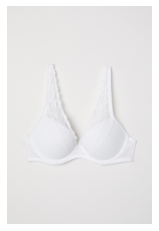

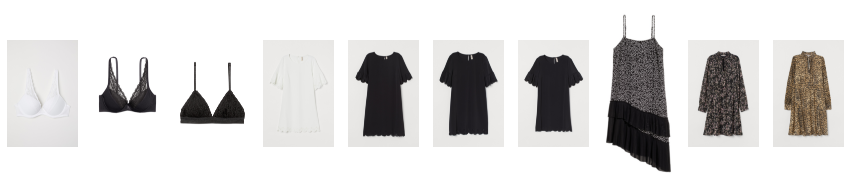

In [37]:
idd = str(280256006)
path = f"images/0{idd[0:2]}/0{idd}.jpg"
img = mpimg.imread(path)
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

similar_items = list(item_similarities[item_similarities['item']==int(idd)]['similar_items'])[0]
_,ax = plt.subplots(1,len(similar_items),figsize=(15,10))

for i,x in enumerate(similar_items):
    id = str(x)
    path = f"images/0{id[0:2]}/0{id}.jpg"
    img = mpimg.imread(path)
    ax[i].imshow(img)
    ax[i].axis('off')
    
plt.show()

In [38]:
transactions.shape

(31788324, 5)

In [39]:
transact_data=transactions[0:30000]
transact_data.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [40]:
test_data = transactions.groupby(by="customer_id")['article_id'].agg(list).reset_index()
test_data.head(25)

,customer_id,article_id
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,"[625548001, 176209023, 627759010, 697138006, 5..."
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,"[583558001, 639677008, 640244003, 521269001, 6..."
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,"[663713001, 541518023, 663713001, 578020002, 7..."
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,"[742079001, 732413001]"
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,"[634249005, 677049001, 698286003, 707704003, 3..."
5,000064249685c11552da43ef22a5030f35a147f723d5b0...,"[738133005, 680265002, 740962001]"
6,0000757967448a6cb83efb3ea7a3fb9d418ac7adf2379d...,"[735843004, 726925001, 715624008, 783388001, 7..."
7,00007d2de826758b65a93dd24ce629ed66842531df6699...,"[505221004, 685687003, 685687004, 685687001, 5..."
8,00007e8d4e54114b5b2a9b51586325a8d0fa74ea23ef77...,"[819423001, 850614001]"
9,00008469a21b50b3d147c97135e25b4201a8c58997f787...,"[673677001, 551080020, 648414023, 673677004]"


In [41]:
test_data.customer_id[10000]

'01dc6b8b738036e5f1d8c5159ab0e09da8acb280aedd081f2295395e3880f65f'

In [42]:
articles.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
5,110065011,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,12,Light Beige,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [44]:
art_index=articles[articles.article_id==760084013].index.values

In [45]:
articles

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
5,110065011,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,12,Light Beige,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105537,953450001,953450,5pk regular Placement1,302,Socks,Socks & Tights,1010014,Placement print,9,Black,...,Socks Bin,F,Menswear,3,Menswear,26,Men Underwear,1021,Socks and Tights,Socks in a fine-knit cotton blend with a small...
105538,953763001,953763,SPORT Malaga tank,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey,A,Ladieswear,1,Ladieswear,2,H&M+,1005,Jersey Fancy,Loose-fitting sports vest top in ribbed fast-d...
105539,956217002,956217,Cartwheel dress,265,Dress,Garment Full body,1010016,Solid,9,Black,...,Jersey,A,Ladieswear,1,Ladieswear,18,Womens Trend,1005,Jersey Fancy,"Short, A-line dress in jersey with a round nec..."
105540,957375001,957375,CLAIRE HAIR CLAW,72,Hair clip,Accessories,1010016,Solid,9,Black,...,Small Accessories,D,Divided,2,Divided,52,Divided Accessories,1019,Accessories,Large plastic hair claw.


[930350002, 930350001]
930350002 a
[105009]
930350001 a
[105008]
[930350002, 930350001]
  products             article_ids
0     Belt  [930350002, 930350001]
['930350002']


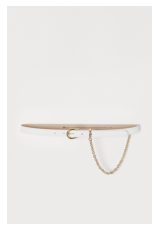

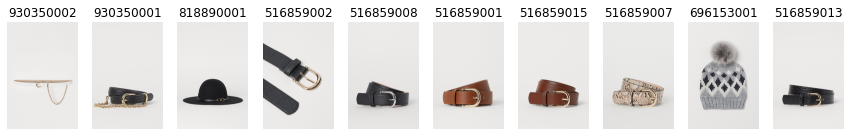

In [47]:
cust_id='01dc6b8b738036e5f1d8c5159ab0e09da8acb280aedd081f2295395e3880f65f'
index_pos=test_data[test_data['customer_id']==cust_id].index.values
arts=test_data.iloc[index_pos[0],1]
print(arts)
products=[]
items=[]
for a in arts:
    print(a,'a')
    art_index=articles[articles.article_id==a].index.values
    print(art_index)
    products.append(articles.at[art_index[0],'product_type_name'])
    items.append(a)
print(items)
unique_items=pd.DataFrame()
unique_items['products']=pd.Series(products)
unique_items['article_ids']=pd.Series(items)
unique_products=unique_items.groupby('products')['article_ids'].agg(list).reset_index()
print(unique_products.head())
final_list=[]
for i,j in zip(unique_products['products'],unique_products['article_ids']):
    arts_list=[]
    for x in j:
        arts_list.append(str(x))
    final_list.append(arts_list[0])
print(final_list)
for ids in final_list:
    idd = str(ids)
    path = f"images/0{idd[0:2]}/0{idd}.jpg"
    img = mpimg.imread(path)
    imgplot = plt.imshow(img)
    plt.axis('off')
    plt.show()

    similar_items = list(item_similarities[item_similarities['item']==int(idd)]['similar_items'])[0]
    _,ax = plt.subplots(1,len(similar_items),figsize=(15,10))

    for i,x in enumerate(similar_items):
        id = str(x)
        path = f"images/0{id[0:2]}/0{id}.jpg"
        img = mpimg.imread(path)
        ax[i].imshow(img)
        ax[i].axis('off')
        ax[i].set_title(id)
    plt.show()

In [48]:
import pandas as pd
import numpy as np
import annoy
from tqdm.notebook import tqdm
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.applications import vgg16
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.models import Model
from tensorflow.keras.applications.imagenet_utils import preprocess_input
import keras
from keras.layers import Dense, Dropout, Flatten
from keras import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.layers import GlobalMaxPooling2D
from PIL import Image
import os
from sklearn.metrics.pairwise import cosine_similarity
import cv2
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelBinarizer
from keras.applications.xception import Xception,preprocess_input
from keras.preprocessing import image
from keras.layers import Input
from keras.backend import reshape
from sklearn.neighbors import NearestNeighbors
from tensorflow.keras.models import Sequential,load_model,Model
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Dropout,Flatten,Reshape,UpSampling2D,Input,Lambda,Conv2DTranspose


In [49]:
images=pd.read_csv('img_pres.csv')
images=images.drop('Unnamed: 0',axis=1)
images.rename(columns={'0':'img_id'},inplace=True)
print(images.shape)
images.head()

(105100, 1)


,img_id
0,0108775015.jpg
1,0108775044.jpg
2,0108775051.jpg
3,0110065001.jpg
4,0110065002.jpg


In [50]:
images['path']=images['img_id'].apply(lambda x: f"images/{x[0:3]}/{x}")

In [51]:
images.head()

,img_id,path
0,0108775015.jpg,images/010/0108775015.jpg
1,0108775044.jpg,images/010/0108775044.jpg
2,0108775051.jpg,images/010/0108775051.jpg
3,0110065001.jpg,images/011/0110065001.jpg
4,0110065002.jpg,images/011/0110065002.jpg


In [52]:
imgs_model_width, imgs_model_height = 224, 224
nb_closest_images = 5 #convert to hyperparameter,adding padding

In [53]:
vgg_model = vgg16.VGG16(weights='imagenet')

# remove the last layers in order to get features instead of predictions
feat_extractor = Model(inputs=vgg_model.input, outputs=vgg_model.get_layer("fc2").output)
top_model = feat_extractor.output
top_model = Dense(4096, activation='relu')(top_model)
top_model = Dense(1072, activation='relu')(top_model)
output_layer=Dense(600,activation='relu')(top_model)
final_model=Model(inputs=vgg_model.input,outputs=output_layer)
# print the layers of the CNN
final_model.summary()

553467096/553467096 [==============================] - 47s 0us/step
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                         

In [54]:
importedImages = []

In [55]:
for f in tqdm(images['path'][0:5000]):
    filename =f
    original = load_img(filename, target_size=(224, 224))
    numpy_image = img_to_array(original)
    image_batch = np.expand_dims(numpy_image, axis=0)
    importedImages.append(image_batch)

  0%|          | 0/5000 [00:00<?, ?it/s]

In [56]:
imagess = np.vstack(importedImages)
imagess.shape

(5000, 224, 224, 3)

In [57]:
processed_imgs=preprocess_input(imagess)

In [58]:
imgs_features = feat_extractor.predict(processed_imgs)

print("features successfully extracted!")
imgs_features.shape

157/157 [==============================] - 814s 5s/step
features successfully extracted!


(5000, 4096)

In [59]:
cosSimilarities = cosine_similarity(imgs_features)
cos_similarities_df = pd.DataFrame(cosSimilarities, columns=images['path'][0:5000], index=images['path'][0:5000])
cos_similarities_df.head()

path,images/010/0108775015.jpg,images/010/0108775044.jpg,images/010/0108775051.jpg,images/011/0110065001.jpg,images/011/0110065002.jpg,images/011/0110065011.jpg,images/011/0111565001.jpg,images/011/0111565003.jpg,images/011/0111586001.jpg,images/011/0111593001.jpg,...,images/048/0489217007.jpg,images/048/0489435001.jpg,images/048/0489435002.jpg,images/048/0489435009.jpg,images/048/0489435010.jpg,images/048/0489435011.jpg,images/048/0489435012.jpg,images/048/0489435014.jpg,images/048/0489435015.jpg,images/048/0489435016.jpg
path,,,,,,,,,,,,,,,,,,,,,
images/010/0108775015.jpg,1.000000,0.961681,0.974386,0.977737,0.961188,0.972273,0.941894,0.957899,0.956268,0.958372,...,0.911624,0.951709,0.951384,0.954769,0.954861,0.950637,0.955817,0.947313,0.954170,0.945386
images/010/0108775044.jpg,0.961681,1.000000,0.978197,0.958795,0.993788,0.981855,0.962285,0.958465,0.963825,0.964833,...,0.918834,0.980947,0.973577,0.976915,0.974529,0.977722,0.975748,0.953639,0.976721,0.961853
images/010/0108775051.jpg,0.974386,0.978197,1.000000,0.965839,0.975869,0.977835,0.948924,0.966358,0.962569,0.964599,...,0.924103,0.970994,0.963249,0.966562,0.967037,0.969613,0.966992,0.957639,0.967525,0.961195
images/011/0110065001.jpg,0.977737,0.958795,0.965839,1.000000,0.966312,0.983325,0.943709,0.943825,0.946089,0.949469,...,0.913624,0.958085,0.963144,0.962034,0.963686,0.957867,0.963485,0.949646,0.962482,0.949798
images/011/0110065002.jpg,0.961188,0.993788,0.975869,0.966312,1.000000,0.988004,0.962125,0.951366,0.954847,0.958377,...,0.913356,0.986874,0.980306,0.981372,0.980496,0.983150,0.981786,0.955436,0.981588,0.965257


In [60]:
cos_similarities_df.to_csv('similarities.csv')